In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-10.766806927452578, 21.994217242086506),
 (61.326973653624634, -43.5221429720579),
 (-22.647019312106394, -54.60231169875736),
 (-63.69841351983383, -52.810012841357306),
 (-5.184962034962098, 20.205673098186864),
 (-82.90160344159546, 61.60228735013689),
 (49.4204114116601, 59.86236304673295),
 (65.38786541966431, -14.941467716918154),
 (61.13593918814533, -81.24859322441377),
 (-48.90029859253457, 68.77067433276781),
 (67.04565319369848, 66.17517867968945),
 (-68.6533361644931, 37.318863818450666),
 (-81.94268759180753, 77.5029922734856),
 (-65.33425301907968, 8.664559362354126),
 (62.557305720453144, -56.024859774163346),
 (-63.46112843218472, 44.53902767397804),
 (-75.9711313740811, -89.83440857075433),
 (23.742930645120524, -46.4183730285586),
 (53.17682077068801, 59.43050953944868),
 (16.67143042037918, -86.50689698306769),
 (-11.543179805049732, 61.14699185424922),
 (52.56186875912326, 37.15021943321335),
 (52.05190563003171, 64.06812750496499),
 (-26.75940118208178, 17.10857

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a10fa2e1853d40913882deaf5c59e5cc


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a10fa2e1853d40913882deaf5c59e5cc&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [12]:
# Get the text of the 'Get' request. 
city_weather.text

'{"cod":"404","message":"city not found"}'

In [13]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'cod': '404', 'message': 'city not found'}

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")


City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 18.16,
  'feels_like': 18.16,
  'temp_min': 10.45,
  'temp_max': 25.18,
  'pressure': 1033,
  'humidity': 71},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 315, 'gust': 4},
 'clouds': {'all': 75},
 'dt': 1641705816,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1641730368,
  'sunset': 1641763771},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
# Get the JSON data.
boston_data = city_weather.json()

In [17]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1641730368,
 'sunset': 1641763771}

In [18]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 25.18 71 75 1.99


In [19]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 1, 9, 5, 23, 36)

In [20]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [22]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | luau
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | caarapo
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | ilebo
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | dombarovskiy
Processing Record 8 of Set 1 | hofn
Processing Record 9 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | kharp
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | maniitsoq
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | codrington
Processing Record 18 of Set 1 | agapovka
Processing Record 19 of Set 1 | french harbor
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | verkhovye
Processing Record 22 of Set 1 | kushmurun
Processing Record 23 of Set 1 | 

Processing Record 41 of Set 4 | ji-parana
City not found. Skipping...
Processing Record 42 of Set 4 | tucurui
Processing Record 43 of Set 4 | lincoln
Processing Record 44 of Set 4 | isilkul
Processing Record 45 of Set 4 | tefe
Processing Record 46 of Set 4 | san cristobal
Processing Record 47 of Set 4 | tahoua
Processing Record 48 of Set 4 | zabid
Processing Record 49 of Set 4 | sisimiut
Processing Record 50 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 1 of Set 5 | asfi
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | kincardine
Processing Record 4 of Set 5 | los llanos de aridane
Processing Record 5 of Set 5 | kalemie
Processing Record 6 of Set 5 | gaborone
Processing Record 7 of Set 5 | monchegorsk
Processing Record 8 of Set 5 | sept-iles
Processing Record 9 of Set 5 | liverpool
Processing Record 10 of Set 5 | rio branco
Processing Record 11 of Set 5 | upernavik
Processing Record 12 of Set 5 | le vauclin
Processing Record 13 of Set 5 | santa

Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | sioux lookout
Processing Record 30 of Set 8 | acajutla
Processing Record 31 of Set 8 | goianesia
Processing Record 32 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 33 of Set 8 | cachoeirinha
Processing Record 34 of Set 8 | benguela
Processing Record 35 of Set 8 | diamantino
Processing Record 36 of Set 8 | yangambi
Processing Record 37 of Set 8 | manyana
Processing Record 38 of Set 8 | baft
Processing Record 39 of Set 8 | stolbishche
Processing Record 40 of Set 8 | marrakesh
Processing Record 41 of Set 8 | posse
Processing Record 42 of Set 8 | gulshat
City not found. Skipping...
Processing Record 43 of Set 8 | ugoofaaru
Processing Record 44 of Set 8 | kudahuvadhoo
Processing Record 45 of Set 8 | kishtwar
Processing Record 46 of Set 8 | aflu
City not found. Skipping...
Processing Record 47 of Set 8 | canoinhas
Processing Record 48 of Set 8 | hobe sound
Processing Record 49 of Set 8 | so

Processing Record 16 of Set 12 | mopipi
Processing Record 17 of Set 12 | sena madureira
Processing Record 18 of Set 12 | zolotkovo
Processing Record 19 of Set 12 | mbandaka
Processing Record 20 of Set 12 | villa bruzual
Processing Record 21 of Set 12 | ketrzyn
Processing Record 22 of Set 12 | nizwa
Processing Record 23 of Set 12 | raudeberg
Processing Record 24 of Set 12 | abu samrah
Processing Record 25 of Set 12 | rudnichnyy
Processing Record 26 of Set 12 | porecatu
Processing Record 27 of Set 12 | brigantine
Processing Record 28 of Set 12 | kissidougou
Processing Record 29 of Set 12 | sokoni
Processing Record 30 of Set 12 | salalah
Processing Record 31 of Set 12 | madona
Processing Record 32 of Set 12 | mehamn
Processing Record 33 of Set 12 | rio gallegos
Processing Record 34 of Set 12 | allapalli
Processing Record 35 of Set 12 | biograd na moru
Processing Record 36 of Set 12 | qarqin
Processing Record 37 of Set 12 | surt
Processing Record 38 of Set 12 | vlotho
Processing Record 39 

In [41]:
len(cities)
print (len)

<built-in function len>


In [42]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luau,-10.7073,22.2247,67.82,92,100,3.22,AO,2022-01-09 05:35:10
1,Nanortalik,60.1432,-45.2371,14.68,80,100,17.49,GL,2022-01-09 05:32:09
2,Caarapo,-22.6342,-54.8222,66.74,86,31,6.02,BR,2022-01-09 05:35:10
3,Ushuaia,-54.8000,-68.3000,40.32,94,47,3.62,AR,2022-01-09 05:26:59
4,Ilebo,-4.3167,20.5833,73.54,96,100,0.36,CD,2022-01-09 05:35:11
5,Dombarovskiy,50.7587,59.5386,5.07,90,67,5.86,RU,2022-01-09 05:35:11
6,Hofn,64.2539,-15.2082,36.86,96,100,16.91,IS,2022-01-09 05:32:08
7,Saint-Philippe,-21.3585,55.7679,83.75,77,12,6.06,RE,2022-01-09 05:30:36
8,Kharp,66.8014,65.8081,-11.99,94,81,6.89,RU,2022-01-09 05:35:12
9,Port Alfred,-33.5906,26.8910,74.46,86,40,22.44,ZA,2022-01-09 05:27:56


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [26]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Luau,AO,2022-01-09 05:35:10,-10.7073,22.2247,67.82,92,100,3.22
1,Nanortalik,GL,2022-01-09 05:32:09,60.1432,-45.2371,14.68,80,100,17.49
2,Caarapo,BR,2022-01-09 05:35:10,-22.6342,-54.8222,66.74,86,31,6.02
3,Ushuaia,AR,2022-01-09 05:26:59,-54.8000,-68.3000,40.32,94,47,3.62
4,Ilebo,CD,2022-01-09 05:35:11,-4.3167,20.5833,73.54,96,100,0.36
5,Dombarovskiy,RU,2022-01-09 05:35:11,50.7587,59.5386,5.07,90,67,5.86
6,Hofn,IS,2022-01-09 05:32:08,64.2539,-15.2082,36.86,96,100,16.91
7,Saint-Philippe,RE,2022-01-09 05:30:36,-21.3585,55.7679,83.75,77,12,6.06
8,Kharp,RU,2022-01-09 05:35:12,66.8014,65.8081,-11.99,94,81,6.89
9,Port Alfred,ZA,2022-01-09 05:27:56,-33.5906,26.8910,74.46,86,40,22.44


In [43]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [45]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1641707371.638738

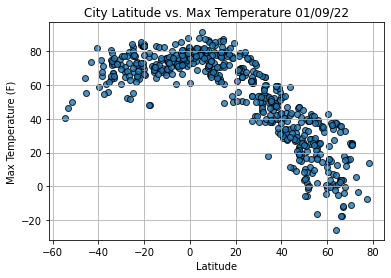

In [46]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

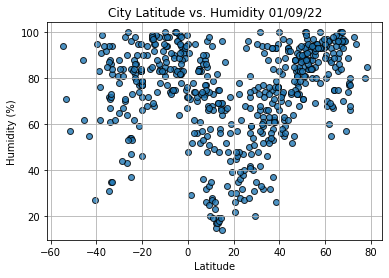

In [47]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

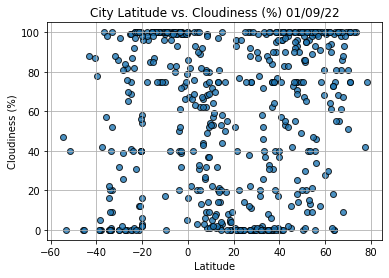

In [48]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

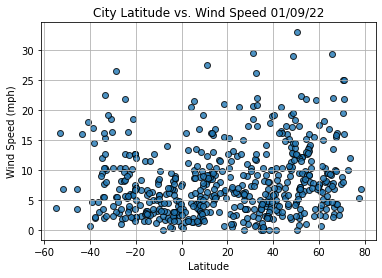

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [50]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [51]:
index13 = city_data_df.loc[13]
print (index13)


City                 Punta Arenas
Lat                        -53.15
Lng                      -70.9167
Max Temp                    46.51
Humidity                       71
Cloudiness                      0
Wind Speed                  16.11
Country                        CL
Date          2022-01-09 05:30:31
Name: 13, dtype: object


In [58]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
546    False
547    False
548     True
549    False
550     True
Name: Lat, Length: 551, dtype: bool

In [57]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Nanortalik,60.1432,-45.2371,14.68,80,100,17.49,GL,2022-01-09 05:32:09
5,Dombarovskiy,50.7587,59.5386,5.07,90,67,5.86,RU,2022-01-09 05:35:11
6,Hofn,64.2539,-15.2082,36.86,96,100,16.91,IS,2022-01-09 05:32:08
8,Kharp,66.8014,65.8081,-11.99,94,81,6.89,RU,2022-01-09 05:35:12
12,Maniitsoq,65.4167,-52.9000,3.49,83,68,9.10,GL,2022-01-09 05:35:12
...,...,...,...,...,...,...,...,...,...
543,Surt,31.2089,16.5887,53.10,73,78,29.55,LY,2022-01-09 05:49:00
544,Vlotho,52.1653,8.8600,38.93,91,100,11.50,DE,2022-01-09 05:49:00
545,Eskisehir,39.7767,30.5206,37.27,100,40,5.75,TR,2022-01-09 05:49:00
548,Buta,2.7858,24.7300,77.05,56,69,1.48,CD,2022-01-09 05:49:01


In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Nanortalik,60.1432,-45.2371,14.68,80,100,17.49,GL,2022-01-09 05:32:09
5,Dombarovskiy,50.7587,59.5386,5.07,90,67,5.86,RU,2022-01-09 05:35:11
6,Hofn,64.2539,-15.2082,36.86,96,100,16.91,IS,2022-01-09 05:32:08
8,Kharp,66.8014,65.8081,-11.99,94,81,6.89,RU,2022-01-09 05:35:12
12,Maniitsoq,65.4167,-52.9000,3.49,83,68,9.10,GL,2022-01-09 05:35:12


In [59]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

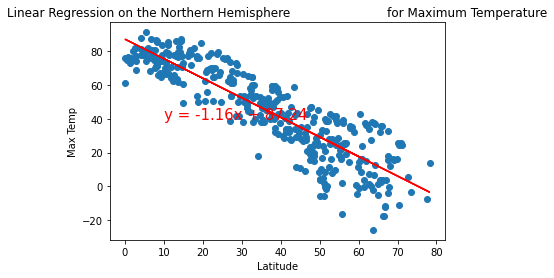

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

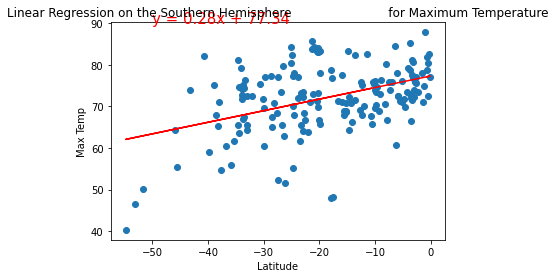

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

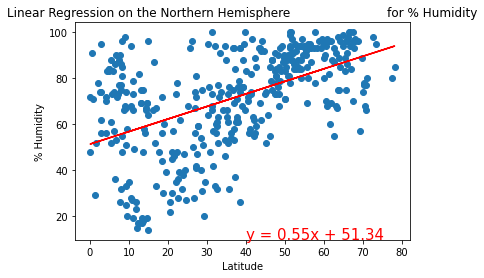

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

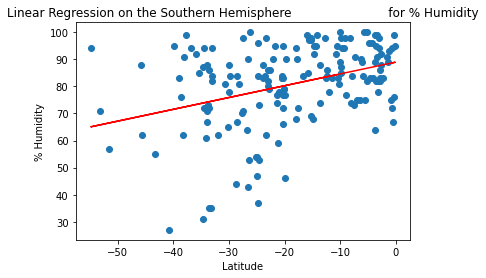

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

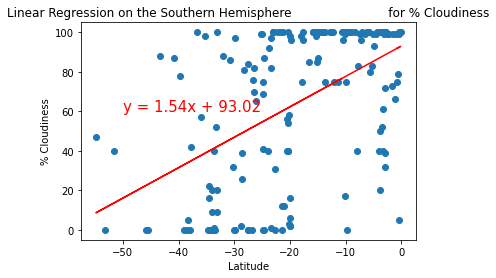

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


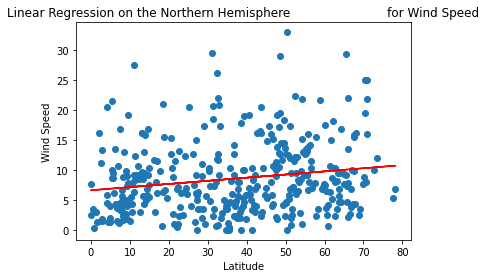

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

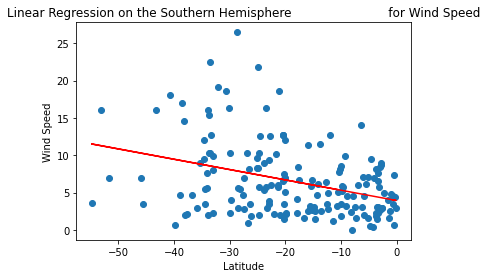

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [2]:
jupyter extension enable --py --sys-prefix widgetsnbextension

SyntaxError: invalid syntax (3316072195.py, line 1)